# Projeto de pós graduação

## Grupo 02 
#### Guilherme Gegenheimer Bazilio
#### José Ricardo de Lima Arrieiro
#### Vilma Angela Teixeira Malini
#### Vivian dos Reis Moreira

# Nova seção

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as lm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projeto Pos Graducao (Colab)/base6.xlsx', sheet_name="Dados")
dfCategoria = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projeto Pos Graducao (Colab)/base6.xlsx', sheet_name="basecompleta2021-12")
display(df)

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning:

Unknown extension is not supported and will be removed



,Feminino?,Tempo Resposta,Procurou Empresa?,Respondida?,Nota do Consumidor,Gestor Cod,Faixa Etaria Cod,UF Cod,Area Cod,Grupo Cod,Como Comprou Cod,Resolvida?
0,1,10.0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,0,10.0,0,1,1.0,1.0,1.0,7.0,1.0,1.0,1.0,0
2,1,8.0,0,1,1.0,1.0,1.0,7.0,1.0,1.0,1.0,0
3,1,99.0,1,0,1.0,1.0,4.0,2.0,1.0,4.0,1.0,0
4,1,9.0,1,1,1.0,1.0,3.0,2.0,1.0,4.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61773,0,1.0,1,1,1.0,14.0,4.0,19.0,6.0,1.0,3.0,0
61774,1,1.0,0,1,5.0,1.0,3.0,24.0,3.0,4.0,4.0,1
61775,1,1.0,1,1,5.0,14.0,2.0,19.0,1.0,3.0,5.0,1
61776,1,1.0,1,1,1.0,6.0,4.0,10.0,3.0,1.0,3.0,0


In [ ]:
#df.drop(['Nota do Consumidor'], axis='columns', inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61778 entries, 0 to 61777
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Feminino?           61778 non-null  int64  
 1   Tempo Resposta      61778 non-null  float64
 2   Procurou Empresa?   61778 non-null  int64  
 3   Respondida?         61778 non-null  int64  
 4   Nota do Consumidor  61778 non-null  float64
 5   Gestor Cod          61778 non-null  float64
 6   Faixa Etaria Cod    61778 non-null  float64
 7   UF Cod              61778 non-null  float64
 8   Area Cod            61778 non-null  float64
 9   Grupo Cod           61778 non-null  float64
 10  Como Comprou Cod    61778 non-null  float64
 11  Resolvida?          61778 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 6.1 MB


In [ ]:
display(df)

,Feminino?,Tempo Resposta,Procurou Empresa?,Respondida?,Nota do Consumidor,Gestor Cod,Faixa Etaria Cod,UF Cod,Area Cod,Grupo Cod,Como Comprou Cod,Resolvida?
0,1,10.0,0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,0,10.0,0,1,1.0,1.0,1.0,7.0,1.0,1.0,1.0,0
2,1,8.0,0,1,1.0,1.0,1.0,7.0,1.0,1.0,1.0,0
3,1,99.0,1,0,1.0,1.0,4.0,2.0,1.0,4.0,1.0,0
4,1,9.0,1,1,1.0,1.0,3.0,2.0,1.0,4.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61773,0,1.0,1,1,1.0,14.0,4.0,19.0,6.0,1.0,3.0,0
61774,1,1.0,0,1,5.0,1.0,3.0,24.0,3.0,4.0,4.0,1
61775,1,1.0,1,1,5.0,14.0,2.0,19.0,1.0,3.0,5.0,1
61776,1,1.0,1,1,1.0,6.0,4.0,10.0,3.0,1.0,3.0,0


# New Section

In [ ]:
#display(df[["Sexo","Faixa Etária","Tempo Resposta","Área"]].describe().transpose())
df.describe()

,Feminino?,Tempo Resposta,Procurou Empresa?,Respondida?,Nota do Consumidor,Gestor Cod,Faixa Etaria Cod,UF Cod,Area Cod,Grupo Cod,Como Comprou Cod,Resolvida?
count,61778.000000,61778.000000,61778.000000,61778.000000,61778.000000,61778.000000,61778.000000,61778.000000,61778.000000,61778.000000,61778.000000,61778.000000
mean,0.613406,8.786688,0.882402,0.986322,2.791139,6.754945,2.620059,11.110266,4.381252,3.463547,3.302389,0.537554
std,0.486973,11.019452,0.322135,0.116151,1.780981,4.301597,1.050515,5.671685,3.153901,1.756603,1.046471,0.498592
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,5.000000,1.000000,1.000000,1.000000,2.000000,2.000000,8.000000,1.000000,2.000000,3.000000,0.000000
50%,1.000000,8.000000,1.000000,1.000000,3.000000,6.000000,3.000000,10.000000,4.000000,4.000000,3.000000,1.000000
75%,1.000000,10.000000,1.000000,1.000000,5.000000,9.000000,3.000000,15.000000,6.000000,5.000000,4.000000,1.000000
max,1.000000,99.000000,1.000000,1.000000,5.000000,16.000000,5.000000,27.000000,13.000000,8.000000,9.000000,1.000000


In [ ]:
from matplotlib.colorbar import Colorbar
for coluna in df:
    fig = px.histogram(df, x=coluna, color=("Resolvida?"), color_discrete_sequence = ['red','blue'])
    fig.show()

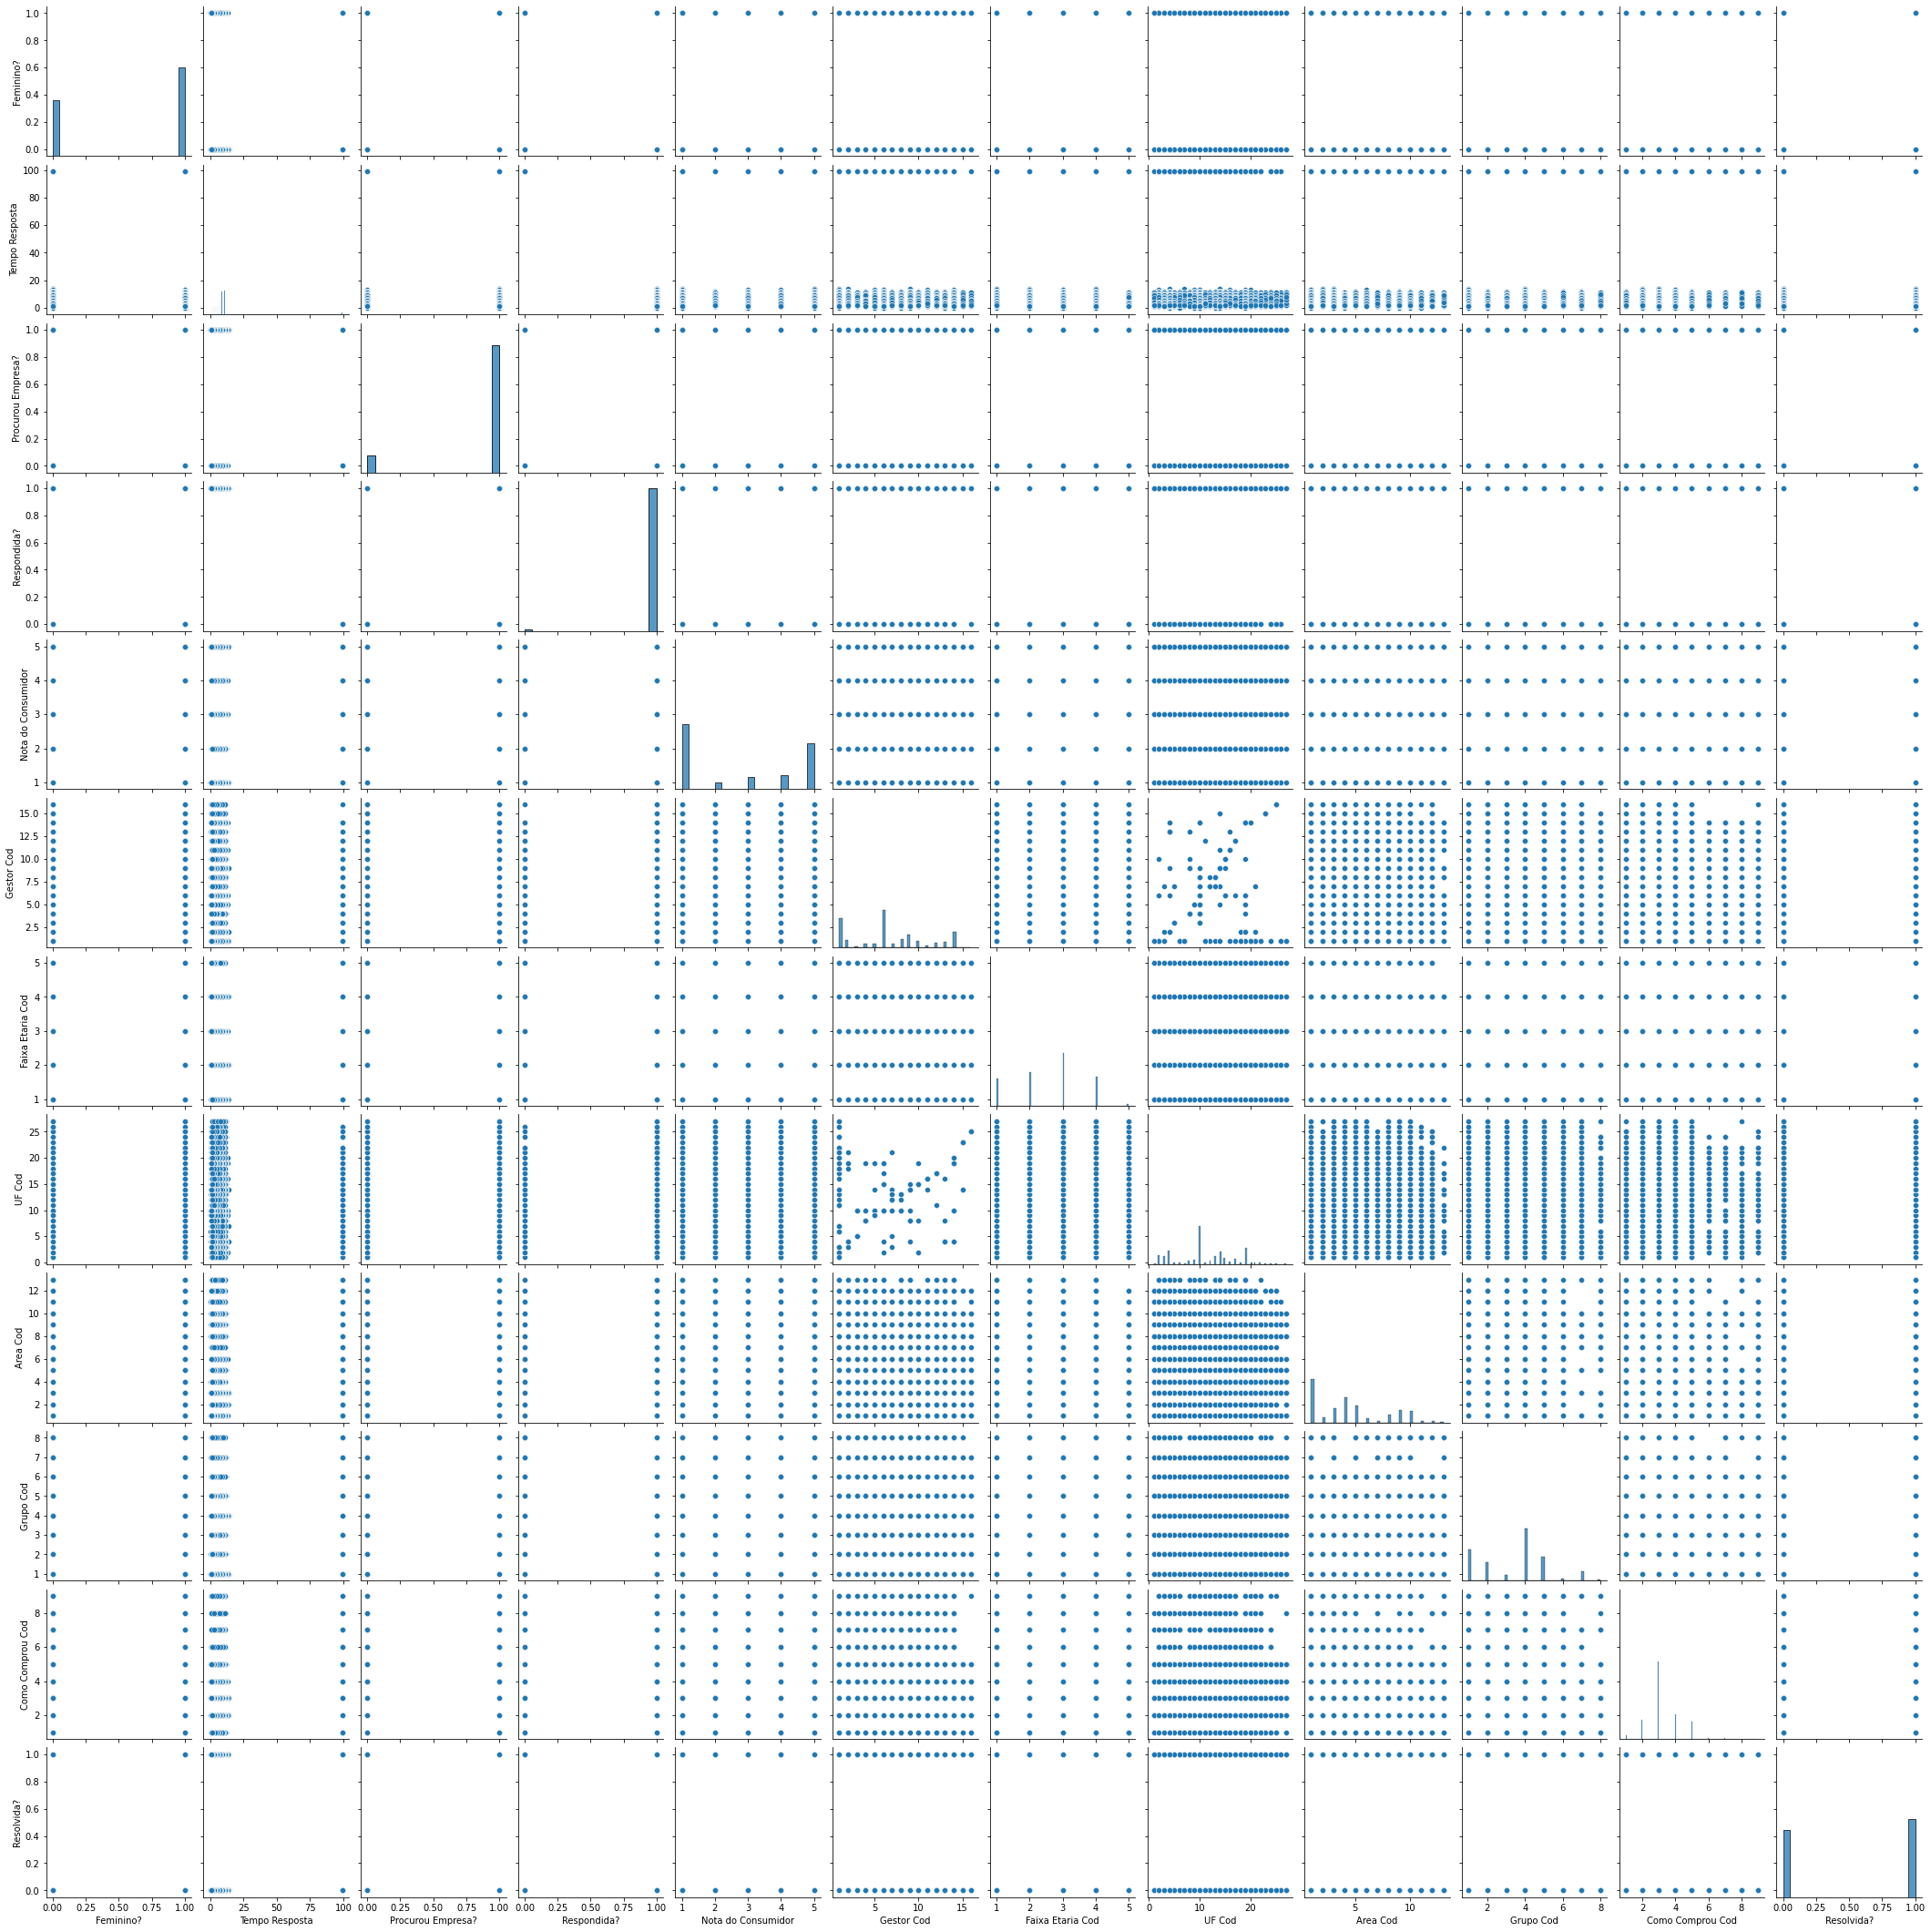

In [ ]:
sns.pairplot(df)
plt.show()


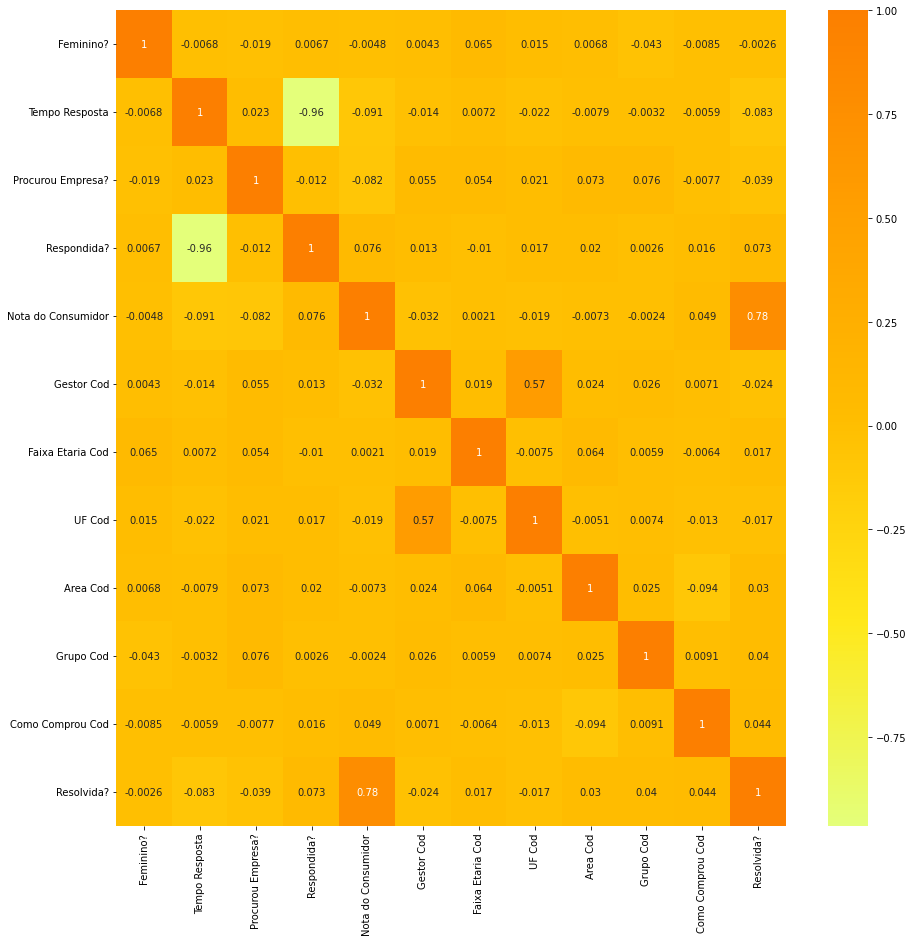

In [ ]:
f, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(df.corr(),cmap = 'Wistia', annot = True)
#plt.show()

In [ ]:
df = df.dropna()
#Matriz X para treinamento
X = df[["Feminino?","Tempo Resposta","Procurou Empresa?","Respondida?","Nota do Consumidor","Gestor Cod","Faixa Etaria Cod","UF Cod","Area Cod","Grupo Cod","Como Comprou Cod"
]].values

#Matrix Y para treinamento
#y = df[["Resolvida?"]].values
y = df[["Resolvida?"]].values.ravel()

#Exibe as matrizes X e Y(transposta)
print("\nMatriz X: ")
display(X)
print("\nMatriz Y: ")
display(y)


Matriz X: 


array([[ 1., 10.,  0., ...,  1.,  1.,  1.],
       [ 0., 10.,  0., ...,  1.,  1.,  1.],
       [ 1.,  8.,  0., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  1.,  1., ...,  1.,  3.,  5.],
       [ 1.,  1.,  1., ...,  3.,  1.,  3.],
       [ 1.,  1.,  1., ...,  1.,  5.,  3.]])


Matriz Y: 


array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
print('\033[1m' + "*********************" + '\033[0m')
print('\033[1m' + "*     RESULTADO     *" + '\033[0m')
print('\033[1m' + "*********************\n" + '\033[0m')
######################################
# Separar dados em Treino e Teste
######################################
 
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 1/5, random_state = 0)
 
######################################
# Treinando o modelo
######################################
 
classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
classifier.fit(X_train, y_train)
 
######################################
# Valor Especifico (input)
#resolvida: 1,1,1,1,5,14,2,19,1,3,5
#nao resolvida: 1,1,1,1,1,1,2,2,1,3,1
######################################

returnClassifier = (classifier.predict([[1,1,1,1,1,1,2,2,1,3,1]]))
print('\033[1m' + "RESOLVIDA?" + '\033[0m')
if returnClassifier == [1]:
  print("Sim: ",returnClassifier)
else:
  print("Não: ",returnClassifier)

######################################
# Previsao
######################################
 
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)
#print(y_pred_prob)
y_pred_prob = y_pred_prob[:,1]
#print(y_pred_prob)
y_result_prob = np.concatenate((y_pred.reshape(len(y_pred),1), y_pred_prob.reshape(len(y_pred_prob),1)),1)
#print(y_result_prob)

######################################
# Matrix de confusao
######################################

cm = confusion_matrix(y_test, y_pred)
print('\033[1m' + "\nMATRIZ DE CONFUSÃO: " + '\033[0m')
print(cm)
print("\n - Verdadeiro Negativo (TN): ",cm[0][0])
print(" - Falso Negativo (FN): ",cm[0][1])
print(" - Falso Positivo (FP): ",cm[1][0])
print(" - Verdadeiro Positivo (TP): ",cm[1][1])

######################################
# Resultado da predicao
######################################

y_result = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
pred = accuracy_score(y_test, y_pred)*100
pred = round(pred,2)
#print(accuracy_score(y_test, y_pred))
print('\033[1m' + "\nPREDIÇÃO: " + '\033[0m', pred,"%")

*********************
*     RESULTADO     *
*********************

RESOLVIDA?
Não:  [0]

MATRIZ DE CONFUSÃO: 
[[5157  515]
 [ 846 5838]]

 - Verdadeiro Negativo (TN):  5157
 - Falso Negativo (FN):  515
 - Falso Positivo (FP):  846
 - Verdadeiro Positivo (TP):  5838

PREDIÇÃO:  88.99 %


In [ ]:
dfCategoria.dropna(inplace=True)

from matplotlib.colorbar import Colorbar
for coluna in dfCategoria:
    fig = px.histogram(dfCategoria, x=coluna, color=("Avaliação Reclamação"), color_discrete_sequence = ['red','blue'])
    fig.show()